#**NHẬN DIỆN ĐƯỜNG CHỈ TAY BẰNG THUẬT TOÁN CNN**

**Load thư viện**

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense,Activation,Dropout,Conv2D,MaxPooling2D,Flatten
from keras.models import  Sequential
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import pandas as pd
from tensorflow.keras.models import load_model

**Liên kết drive**

In [65]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


**Tạo tập train, validation, test**

In [66]:
train_dataset = ImageDataGenerator(rescale=1. / 255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
validation_dataset = ImageDataGenerator(rescale=1./255)
test_dataset = ImageDataGenerator(rescale=1./255)

**Gắn giá trị vào train, validation, test**

In [67]:
training_generator = train_dataset.flow_from_directory(
                      '/content/drive/MyDrive/Python/BTVN3/CNN_Coi chỉ tay/Datasets/Train3',
                        target_size=(300, 300),
                        batch_size=50,
                        class_mode="categorical")
validation_generator = validation_dataset.flow_from_directory(
                        "/content/drive/MyDrive/Python/BTVN3/CNN_Coi chỉ tay/Datasets/Validation3",
                         target_size=(300, 300),
                          batch_size=50,
                         class_mode="categorical")
test_generator = test_dataset.flow_from_directory(
                        "/content/drive/MyDrive/Python/BTVN3/CNN_Coi chỉ tay/Datasets/Test3",
                         target_size=(300, 300),
                          batch_size=50,
                         class_mode="categorical")

Found 69 images belonging to 3 classes.
Found 27 images belonging to 3 classes.
Found 3 images belonging to 3 classes.


**Xem nhãn đầu ra**

In [68]:
training_generator.class_indices

{'chỉ tay hình chữ M': 0,
 'hình chỉ tay hình chữ A': 1,
 'Đường chỉ tay không rõ': 2}

**Tạo mô hình**

In [69]:
#CNN
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same', input_shape=(300,300,3)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
#ANN
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.1))
model.add(Dense(512,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.1))
model.add(Dense(3,activation='softmax'))

In [70]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 300, 300, 32)      896       
                                                                 
 conv2d_43 (Conv2D)          (None, 300, 300, 32)      9248      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 150, 150, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_44 (Conv2D)          (None, 150, 150, 64)      18496     
                                                                 
 conv2d_45 (Conv2D)          (None, 150, 150, 64)      36928     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 75, 75, 64)       0         
 g2D)                                                 

**Chạy mô hình**

In [71]:
history = model.fit(training_generator,batch_size=20,epochs=50,verbose=1,validation_data=validation_generator)

Epoch 1/50
2/2 [==============================] - 3s 2s/step - loss: 71.3328 - accuracy: 0.3188 - val_loss: 134.7615 - val_accuracy: 0.3333
Epoch 2/50
2/2 [==============================] - 2s 1s/step - loss: 44.6121 - accuracy: 0.4493 - val_loss: 3.5504 - val_accuracy: 0.4074
Epoch 3/50
2/2 [==============================] - 2s 1s/step - loss: 1.7284 - accuracy: 0.3913 - val_loss: 2.2022 - val_accuracy: 0.3333
Epoch 4/50
2/2 [==============================] - 2s 1s/step - loss: 1.6107 - accuracy: 0.3333 - val_loss: 1.1088 - val_accuracy: 0.2963
Epoch 5/50
2/2 [==============================] - 2s 2s/step - loss: 1.1938 - accuracy: 0.3623 - val_loss: 1.1250 - val_accuracy: 0.3333
Epoch 6/50
2/2 [==============================] - 2s 1s/step - loss: 1.0567 - accuracy: 0.4493 - val_loss: 1.1024 - val_accuracy: 0.3333
Epoch 7/50
2/2 [==============================] - 2s 1s/step - loss: 1.0425 - accuracy: 0.4493 - val_loss: 1.1697 - val_accuracy: 0.3333
Epoch 8/50
2/2 [=====================

**Lưu mô hình**

In [72]:
model.save('/content/drive/MyDrive/Colab Notebooks/CNN_NhanDienChiTay.h5')

**Tải mô hình**

In [73]:
from keras.models import load_model
model=load_model('/content/drive/MyDrive/Colab Notebooks/CNN_NhanDienChiTay.h5')

**Vẽ biểu đồ độ chính xác**

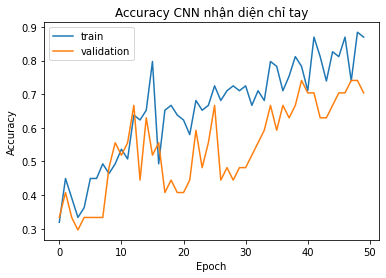

In [74]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy CNN nhận diện chỉ tay')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

**Kiểm tra, dự đoán kết quả**

In [75]:
#Load thư viện
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

*Kiểm tra tập test*

In [76]:
result=np.argmax(model.predict(test_generator),axis=1)
result

array([0, 0, 0])

*Kiểm tra ảnh bên ngoài*

Chỉ tay chữ M


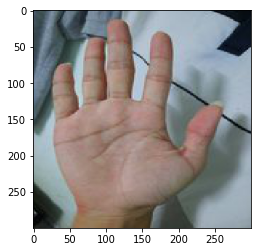

In [77]:
#Load ảnh lên
img=load_img('chitay.jpg',target_size=(300,300,3))
#show ảnh lên màn hình
plt.imshow(img)

# tạo mảng cho ảnh
img=img_to_array(img)  
img=img.reshape(1,300,300,3)
img=img.astype('float32')
img=img/255

#Kiểm tra độ chính xác và dự đoán 
import numpy as np
result=np.argmax(model.predict(img),axis=1)
if result == 0:
    print("Chỉ tay chữ M")
elif result == 1:
    print("Chỉ tay chữ A")
elif result == 2:
    print("Chỉ tay không rõ")


